In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

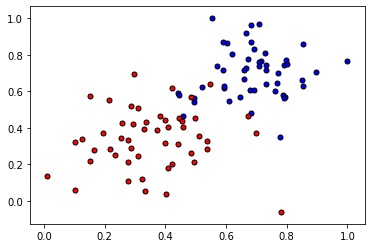

In [7]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [8]:
def activation_function(x, function='sigmoid'):
    if function  == 'sigmoid':
        x = 1 / (1 + np.exp(-x))
    elif function == 'step':
        x = 1 if x >= 0 else 0
    elif function == 'softmax':
        x = np.exp(x)
        x = np.divide (x, x.sum())
    return x
        

In [9]:
def calc_score(X, W, b):
    score = np.matmul(X,W) + b
    return score


In [13]:
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        if calc_score(X[i], W, b) != y[i]:
            if calc_score(X[i], W, b)  == 0 :
                for j in range(len(X[i])):
                    W[j] = W[j] + learn_rate*X[i][j]
                b = b + learn_rate
            else:
                for j in range(len(X[i])):
                    W[j] = W[j] - learn_rate*X[i][j]
                b = b - learn_rate
    return W, b

In [39]:
def gradDesc(X, y, W, b, learn_rate):
    del_y = (y - activation_function(calc_score(X, W, b)))
    W = W + learn_rate * X * del_y
    b = b + learn_rate * (y - del_y)
    return W, b

In [40]:
def error(y, ouput, formula = 'cross_entropy'):
    if formula == 'cross_entropy':
        y = np.float_(y)
        ouput = np.float_(ouput)
        error = -np.sum(y * np.log(ouput) + (1 - y) * np.log(1 - ouput))
    return error

In [52]:
def train(X, y, learn_rate = 0.01, epochs = 10, graph_lines=False):
    errors = []
    n_records, n_features = X.shape
    last_loss = None
    W = np.random.normal(scale=1 / n_features**.5, size=n_features)
    b = 0
    for e in range(epochs):
        del_w = np.zeros(W.shape)
        for Xi, yi in zip(X, y):
            outi = activation_function(calc_score(Xi, W, b))
            err = error(yi, outi, 'cross_entropy')
            W, b = gradDesc(Xi, yi, W, b, learn_rate)
        
        out = activation_function(calc_score(X, W, b))
        loss = np.mean(error(y, out, 'cross_entropy'))
        errors.append(loss)
        
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == y)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-W[0]/W[1], -b/W[1])
                
    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-W[0]/W[1], -b/W[1], 'black')

    # Plotting the data
    plot_points(X, y)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show() 


========== Epoch 0 ==========
Train loss:  76.17401458077467
Accuracy:  0.5

========== Epoch 10 ==========
Train loss:  284.7029686877993   WARNING - Loss Increasing
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  544.6482478026128   WARNING - Loss Increasing
Accuracy:  0.5

========== Epoch 30 ==========
Train loss:  804.8161587215751   WARNING - Loss Increasing
Accuracy:  0.5

========== Epoch 40 ==========
Train loss:  nan
Accuracy:  0.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encoun


========== Epoch 50 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 60 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 70 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 80 ==========
Train loss:  nan
Accuracy:  0.5

========== Epoch 90 ==========
Train loss:  nan
Accuracy:  0.5


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encoun

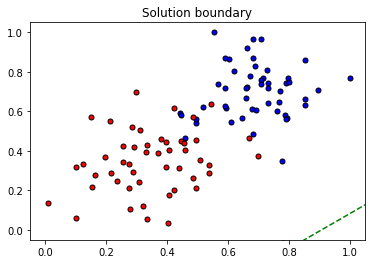

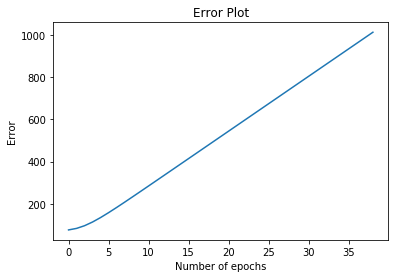

In [53]:
np.random.seed(44)

epochs = 100
learn_rate = 0.01
train(X, y, learn_rate, epochs, True)